In [1]:
import pandas as pd
from pycaret.classification import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# 데이터 로딩
match_data = pd.read_csv('/Users/lhe339/Documents/GitHub/nextorial/data/데이터 분석가_과제_Type A/match_data.csv')
test_data = pd.read_csv('/Users/lhe339/Documents/GitHub/nextorial/data/데이터 분석가_과제_Type A/test_data.csv')

In [7]:
class DataProcessor:
    
    def __init__(self, df):
        self.data = df



    def preprocess(self):
        self.data = self.compute_recent_performance_index()
        self.data = self.compute_recent_winprob_stats()
        self.data = self.compute_streak_rate()

    

    def compute_recent_performance_index(self):
        self.data['recent_performance_index'] = self.data['winstreak'] * self.data['recentwinprob']
        return self.data


    def compute_recent_winprob_stats(self):
        grouped = self.data.groupby('matchid')
        self.data['recentwinprob_max'] = grouped['recentwinprob'].transform('max')
        self.data['recentwinprob_min'] = grouped['recentwinprob'].transform('min')
        self.data['recentwinprob_diff'] = self.data['recentwinprob_max'] - self.data['recentwinprob_min']
        self.data['recentwinprob_mean'] = grouped['recentwinprob'].transform('mean')
        self.data['recentwinprob_diff_from_mean'] = (self.data['recentwinprob'] - self.data['recentwinprob_mean'])**2
        self.data['recentwinprob_variance'] = grouped['recentwinprob_diff_from_mean'].transform('mean')
        return self.data


    @staticmethod
    def calculate_streak_rate(row):
        winstreak, losestreak = row['winstreak'], row['losestreak']
        if winstreak + losestreak == 0:
            return 0
        return winstreak / (winstreak + losestreak)

    def compute_streak_rate(self):
        self.data['streak_rate'] = self.data.apply(self.calculate_streak_rate, axis=1)
        return self.data

In [8]:
processor = DataProcessor(match_data)
processor.preprocess()
processed_data = processor.data

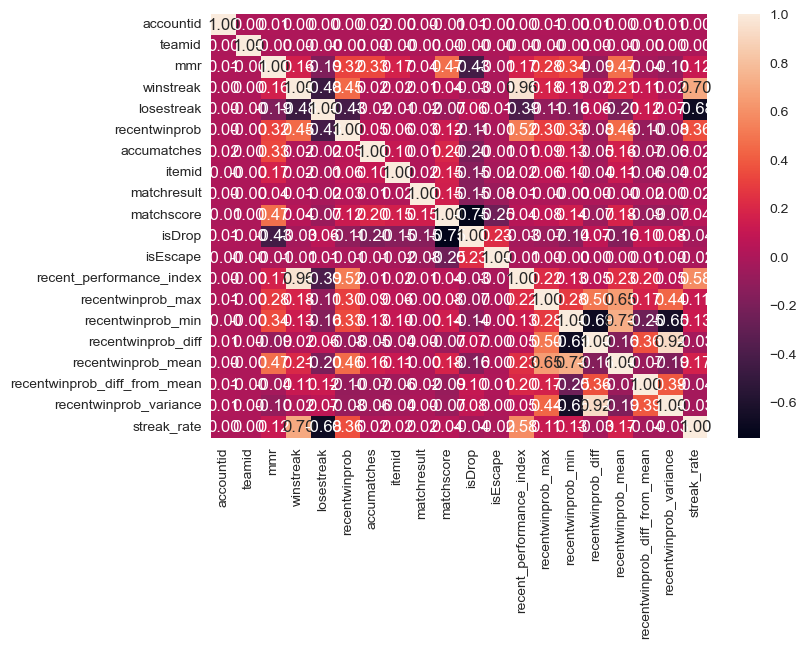

In [9]:
# 문자열 데이터를 포함하는 열을 제거
numeric_data = processed_data.select_dtypes(include=[np.number])

# 상관 행렬 계산
corr_matrix = numeric_data.corr()

plt.figure(figsize=(50, 40))

# 히트맵 표시
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={'size': 20})

# x와 y축의 레이블에 대한 글꼴 크기 조정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [10]:
# PyCaret 설정
clf1 = setup(data = match_data,
             target = 'matchresult',
             ignore_features = ['createdatekst', 'matchid', 'accountid', 'guildid'],  # 무시할 특성
             ordinal_features = {'tier': ['unranked', 'bronze', 'silver', 'gold', 'platinum', 'diamond', 'master']},  # 순서형 특성
             session_id=123)  # 재현 가능성을 위한 세션 ID 설정

,Description,Value
0,Session id,123
1,Target,matchresult
2,Target type,Binary
3,Original data shape,"(410384, 24)"
4,Transformed data shape,"(410384, 26)"
5,Transformed train set shape,"(287268, 26)"
6,Transformed test set shape,"(123116, 26)"
7,Ignore features,4
8,Ordinal features,1
9,Numeric features,18


In [11]:
# 모델 비교
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:28:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5586,0.5897,0.6531,0.5492,0.5962,0.1171,0.1197,7.2400


Processing:   0%|          | 0/61 [00:00<?, ?it/s]